In [2]:
#패키지 임포트
import numpy as np
import pymannkendall as mk # mk분석 패키지
import pandas as pd
import matplotlib.pyplot as plt #시각화 패키지
%matplotlib inline
import matplotlib.font_manager as fm #한글폰트 패키지
# font settong
plt.rcParams['font.family'] = 'HCR Batang'#함초롱바탕
import os #경로 설정시 필요한 패키지
# plt box setting
from matplotlib.offsetbox import AnchoredText 
import scipy.stats as stats
from sklearn.metrics import r2_score
import matplotlib.pylab as pylab
## encoding으로 오류뜰시 euc-kr로 변경해보고 다시 시도
df = pd.read_csv('%s/(CSV)Trend + 밭 필터링.csv'%(os.getcwd()), encoding='euc-kr')

In [3]:
df

,지역,소규모수도시설명,분류 기호,분류명,area,비율,Trend,Slope
0,강원도 원주시,신림,F,밭,2319,0.0119,decreasing,-0.031818
1,제주특별자치도,용담수원,F,밭,4946,0.0407,decreasing,-0.033333
2,제주특별자치도,삼양12수원,F,밭,7075,0.0503,decreasing,-0.014815
3,경상북도 의성군,다인,F,밭,11986,0.0650,decreasing,-0.050000
4,경기도 가평군,설악,F,밭,12136,0.0653,increasing,0.026667
5,경상북도 울릉군,북면,F,밭,13332,0.0713,decreasing,-0.050000
6,충청북도 청주시,낭성 #1관정,F,밭,21640,0.1158,increasing,0.037500
7,충청북도 진천군,백곡,F,밭,28867,0.1638,increasing,0.040000
8,전라남도 화순군,청풍이양,F,밭,39490,0.2137,increasing,0.050000
9,인천광역시,길상,F,밭,44451,0.2594,increasing,0.080000


In [4]:
df = df.set_index('소규모수도시설명')

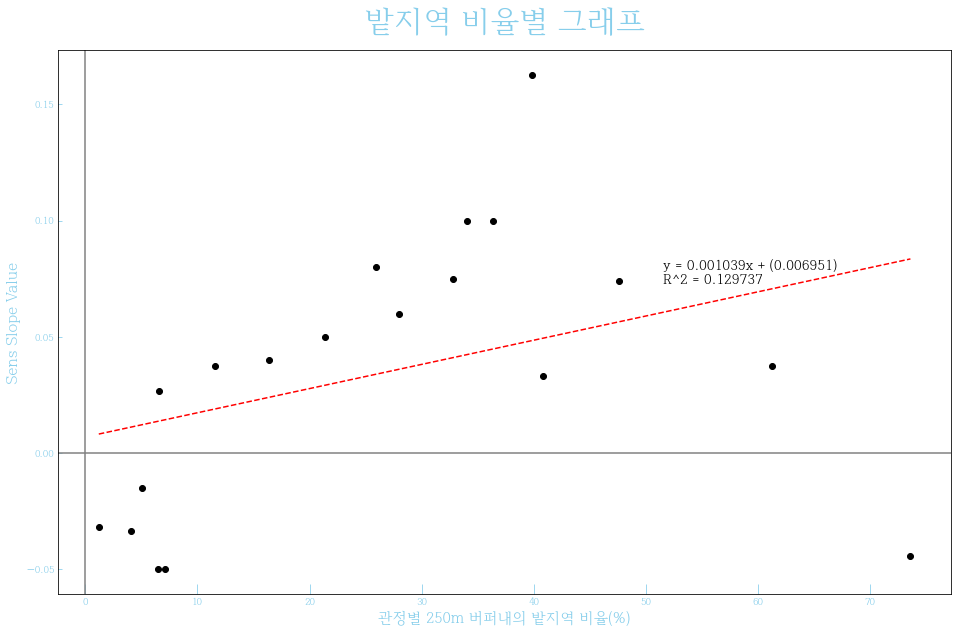

In [6]:
rate_data = df['비율']
slope_data = df['Slope']

fig, ax = plt.subplots(figsize = (16,10))
x = rate_data*100
y = slope_data
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
r2 = r2_score(y, p(x))

pylab.plot(x,y, 'o', color = 'black')
pylab.plot(x,p(x), "r--")
ax.axhline(y=0, color = 'gray')
ax.axvline(x=0, color = 'gray')
equation ="y=%.6fx+(%.6f)"%(z[0],z[1])

ax.set_title('밭지역 비율별 그래프', fontsize = 30 ,pad = 20, color = 'skyblue')
ax.set_xlabel('관정별 250m 버퍼내의 밭지역 비율(%)', fontsize=15, color = 'skyblue')
ax.set_ylabel('Sens Slope Value', fontsize = 15, color = 'skyblue')
ax.tick_params(axis = 'x', direction='in', length = 10, labelcolor = 'skyblue', color = 'skyblue')
ax.tick_params(axis = 'y', direction='in', labelcolor = 'skyblue', color = 'skyblue')

text = "y = %.6fx + (%.6f)\nR^2 = %.6f" % (z[0], z[1], r2)
ax.text(x.max()*0.7, z[0]*x.max()+z[1], text, fontsize=14, verticalalignment='top')
plt.show()